In [1]:
import os
import keras
import numpy as np
import sklearn.model_selection as ms
import sklearn.decomposition as decomp
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import librosa
import librosa.display as display

Using TensorFlow backend.


In [2]:
#load in the saved data
X = np.load('data_mat/X_5.npy')
Y = np.load('data_mat/Y_5.npy')
X.shape

(500, 20, 1290)

Text(0.5, 1.0, 'Classical MFCC feature heat map')

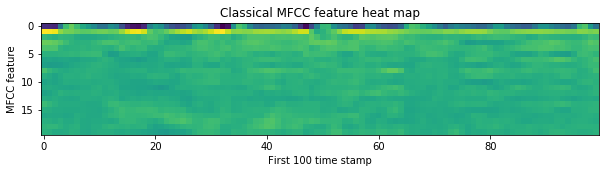

In [3]:
plt.figure(figsize=(10, 4))
plt.imshow(X[0][:, :100])
plt.xlabel('First 100 time stamp')
plt.ylabel('MFCC feature')
plt.title('Classical MFCC feature heat map')

Text(0.5, 1.0, 'Hip-Hop MFCC feature heat map')

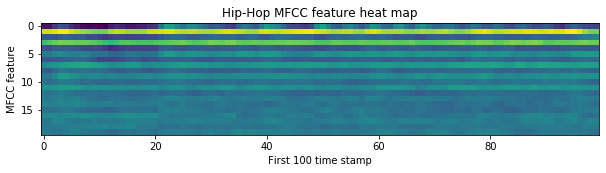

In [4]:
plt.figure(figsize=(10, 4))
plt.imshow(X[100][:, :100])
plt.xlabel('First 100 time stamp')
plt.ylabel('MFCC feature')
plt.title('Hip-Hop MFCC feature heat map')

Text(0.5, 1.0, 'Metal MFCC feature heat map')

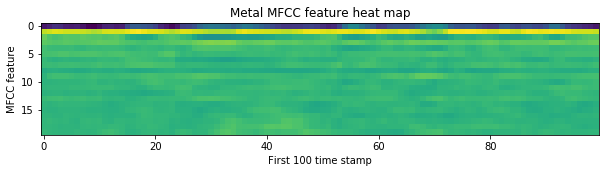

In [5]:
plt.figure(figsize=(10, 4))
plt.imshow(X[250][:, :100])
plt.xlabel('First 100 time stamp')
plt.ylabel('MFCC feature')
plt.title('Metal MFCC feature heat map')

Text(0.5, 1.0, 'Pop MFCC feature heat map')

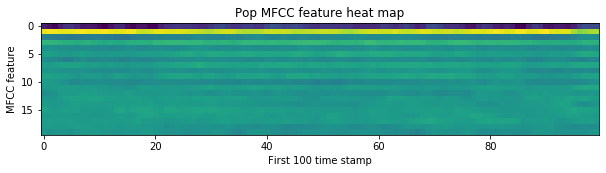

In [6]:
plt.figure(figsize=(10, 4))
plt.imshow(X[350][:, :100])
plt.xlabel('First 100 time stamp')
plt.ylabel('MFCC feature')
plt.title('Pop MFCC feature heat map')

Text(0.5, 1.0, 'Blues MFCC feature heat map')

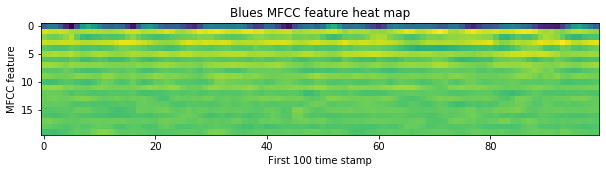

In [7]:
plt.figure(figsize=(10, 4))
plt.imshow(X[450][:, :100])
plt.xlabel('First 100 time stamp')
plt.ylabel('MFCC feature')
plt.title('Blues MFCC feature heat map')

In [8]:
X_test = np.load('mfcc_vals/X_test.npy')
X_train = np.load('mfcc_vals/X_train.npy')
Y_test = np.loadtxt('mfcc_vals/Y_test.txt')
Y_train = np.loadtxt('mfcc_vals/Y_train.txt')
X_train.shape

(400, 1290, 20)

In [9]:
def model(input_shape):
    X_inputs = keras.layers.Input(input_shape)
    X = X_inputs
    
    X = keras.layers.Conv1D(filters=16, kernel_size=64, dilation_rate=8,
                            padding='same', data_format="channels_last")(X)
    X = keras.layers.Dropout(0.5)(X)    
    X = keras.layers.AveragePooling1D(pool_size=32)(X)
    X = keras.layers.BatchNormalization(axis = 2)(X)
    X = keras.layers.Activation('relu')(X)
    
    X = keras.layers.Conv1D(filters=64, kernel_size=16, dilation_rate=2, padding='valid', data_format="channels_last")(X)
    X = keras.layers.Dropout(0.5)(X)    
    X = keras.layers.AveragePooling1D(pool_size=4)(X)
    X = keras.layers.BatchNormalization(axis = 2)(X)
    X = keras.layers.Activation('relu')(X)

    X = keras.layers.Flatten()(X)
#     X = keras.layers.Dropout(0.5)(X)    
    X = keras.layers.Dense(5, activation='softmax')(X)
    
    model = keras.models.Model(inputs=X_inputs, outputs=X, name='cnn')
    return model

In [10]:
model = model(X_train.shape[1:])
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [11]:
model.summary()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1290, 20)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1290, 16)          20496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1290, 16)          0         
_________________________________________________________________
average_pooling1d_1 (Average (None, 40, 16)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 16)            64        
_________________________________________________________________
activation_1 (Activation)    (None, 40, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 64)            16448   

In [12]:
model.fit(X_train, Y_train, epochs=50, batch_size=64)

Epoch 1/50
400/400 [==============================] - 2s 4ms/step - loss: 1.3098 - categorical_accuracy: 0.4675
Epoch 2/50
400/400 [==============================] - 1s 2ms/step - loss: 0.7999 - categorical_accuracy: 0.6850
Epoch 3/50
400/400 [==============================] - 1s 3ms/step - loss: 0.6417 - categorical_accuracy: 0.7750
Epoch 4/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5774 - categorical_accuracy: 0.7800
Epoch 5/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4951 - categorical_accuracy: 0.8075
Epoch 6/50
400/400 [==============================] - 1s 3ms/step - loss: 0.4738 - categorical_accuracy: 0.8275
Epoch 7/50
400/400 [==============================] - 1s 3ms/step - loss: 0.4235 - categorical_accuracy: 0.8450
Epoch 8/50
400/400 [==============================] - 1s 2ms/step - loss: 0.3835 - categorical_accuracy: 0.8675
Epoch 9/50
400/400 [==============================] - 1s 2ms/step - loss: 0.3676 - categorical_accuracy:

In [13]:
preds_trn = model.evaluate(X_train, Y_train)
print ("Train Loss = " + str(preds_trn[0]))
print ("Train Accuracy = " + str(preds_trn[1]))

400/400 [==============================] - 0s 1ms/step
Loss = 0.1179244190454483
Train Accuracy = 0.9599999785423279


In [14]:
preds = model.evaluate(X_test, Y_test)
print ("TestLoss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

100/100 [==============================] - 0s 832us/step
Loss = 0.5289565968513489
Test Accuracy = 0.7900000214576721


In [ ]:
preds = model.evaluate(X_train, Y_train)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [15]:
model = m

NameError: name 'm' is not defined

In [ ]:
print(len(model.layers))

In [ ]:
def extract_all_features(X, model, layer_nums, batch_num):
    """Extract all the features by taking out the activation output of the layers specified in layer_nums
    
        X : the data that we are trying to extract features from
        model: the model that we are using to extract the features
        layer_nums: the layer number that we want to use as feature extractors
    """
    outputs = [model.layers[layer].output for layer in layer_nums]
    f = keras.backend.function([model.input, keras.backend.learning_phase()], outputs)
    ## split up into smaller chunks
    layer_outs = []
    m = X.shape[0]
    for i in range(batch_num):
        val = [f([X[(m // batch_num * i):(m // batch_num * (i+1)), :, :], 0])]
        layer_outs += val
    result = []
    for i in range(len(layer_nums)):
        layer_outs2 = []
        for batch in range(batch_num):
            activations = layer_outs[batch][i]
            activations = activations.reshape(activations.shape[0], -1)
            layer_outs2 += [activations]
        result += [np.vstack(np.array(layer_outs2))]
    return result

In [ ]:
layer_outs_train = extract_all_features(X_train, model, [5, 11], 10)

In [ ]:
layer_outs_test = extract_all_features(X_test, model, [5, 11], 1)

In [ ]:
conv_1_train, conv_2_train = layer_outs_train
conv_1_test, conv_2_test = layer_outs_test
np.savetxt('cnn_extracted_features/conv_1_train.txt', conv_1_train)
np.savetxt('cnn_extracted_features/conv_2_train.txt', conv_2_train)
np.savetxt('cnn_extracted_features/conv_1_test.txt', conv_1_test)
np.savetxt('cnn_extracted_features/conv_2_test.txt', conv_2_test)

In [ ]:
X_train = np.load('mfcc_vals/X_train.npy')
X_test = np.load('mfcc_vals/X_test.npy')
Y_train = np.loadtxt('mfcc_vals/Y_train.txt')
Y_test = np.loadtxt('mfcc_vals/Y_test.txt')
conv_2_train = np.loadtxt('cnn_extracted_features/conv_2_train.txt')
conv_1_train = np.loadtxt('cnn_extracted_features/conv_1_train.txt')
conv_2_test = np.loadtxt('cnn_extracted_features/conv_2_test.txt')
conv_1_test = np.loadtxt('cnn_extracted_features/conv_1_test.txt')

In [ ]:
pca_conv = decomp.PCA(3)
pca_conv.fit(conv_2_train)
test_pca = pca_conv.transform(conv_2_test)
colors = np.argmax(Y_test, axis=1)
colors_txt = np.empty(len(colors), dtype=str)
colors_txt[colors==0] = 'red'
colors_txt[colors==1] = 'blue'
colors_txt[colors==2] = 'green'
colors_txt[colors==3] = 'yellow'
colors_txt[colors==4] = 'black'
genres = ['classical', 'hiphop', 'metal', 'pop', 'blues']
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
for i in range(5):
    ax.scatter(test_pca[colors==i, 0].ravel(), test_pca[colors==i,1].ravel(), test_pca[colors==i,2].ravel(),
                label=genres[i])
ax.legend()
plt.show()